In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import time
import math
import matplotlib.pyplot as plt

In [93]:
X_train,Y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

N = len(X_train)#number of columns
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want
d = len(X_train[0])#number of rows



In [3]:
def prediction(x, w):
    value = np.dot(x, w)

    if value >= 0:
      value = 1
    else:
      value = 0            
    return value


In [83]:
historical = [[]*d]

def perceptron(X_train,Y_train):
    weights = np.zeros(d)
    learning = 0.05
    start = time.time()


    for i in range(len(X_train)):
        for j in range(d):
            historic[j].append(weights[j])

        predict = prediction(X_train[i], weights)
        weights += learning * (Y_train[i] - predict) * X_train[i]


    end = time.time()
    print(end - start , "segundos")
    
    return weights
    
    
print(perceptron(X_train,Y_train))

0.02583622932434082 segundos
[-2.11746784e-01 -1.42183801e-01 -2.07969321e-01 -2.11672337e-01
 -2.51569837e-02 -2.03254617e-02 -1.97226041e-01 -1.97852741e-01
  7.84952831e-03  1.38499916e-01 -2.67153726e-01 -1.19293111e-02
 -2.95013492e-01 -2.64471551e-01 -1.74323734e-01  1.80042562e-01
  1.05439333e-01 -7.11857117e-02  7.32403868e-02  2.93844555e-01
 -2.61234612e-01 -2.64865427e-01 -2.79242235e-01 -2.61515884e-01
 -1.81173739e-01 -2.88362134e-02 -1.52882682e-01 -2.64044425e-01
 -2.11201259e-01  1.05012974e-02 -1.38777878e-17]


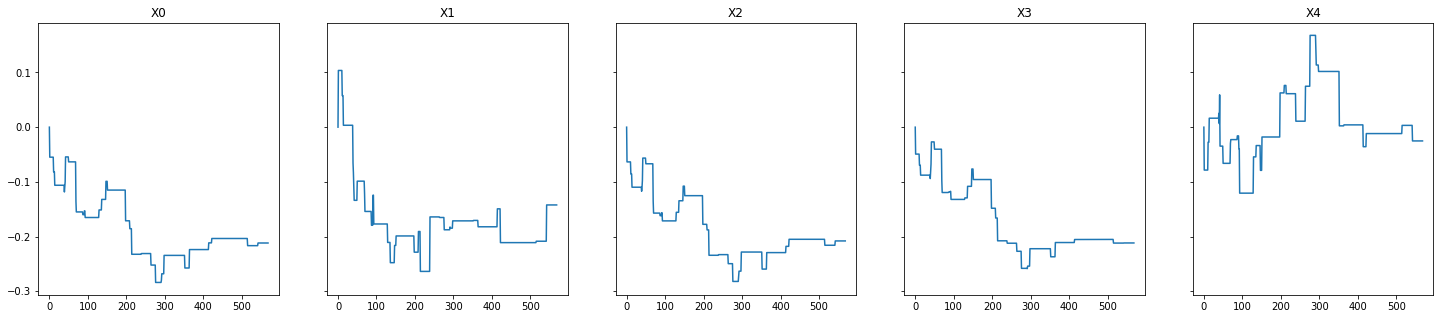

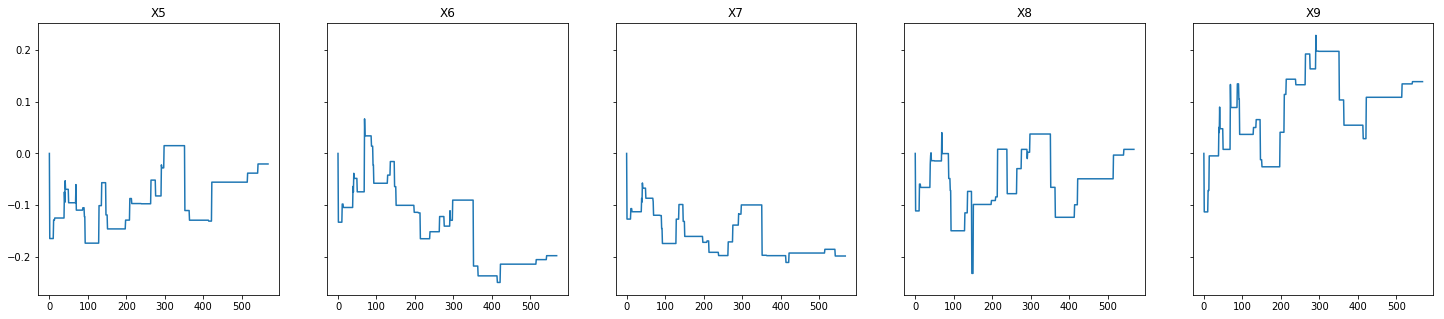

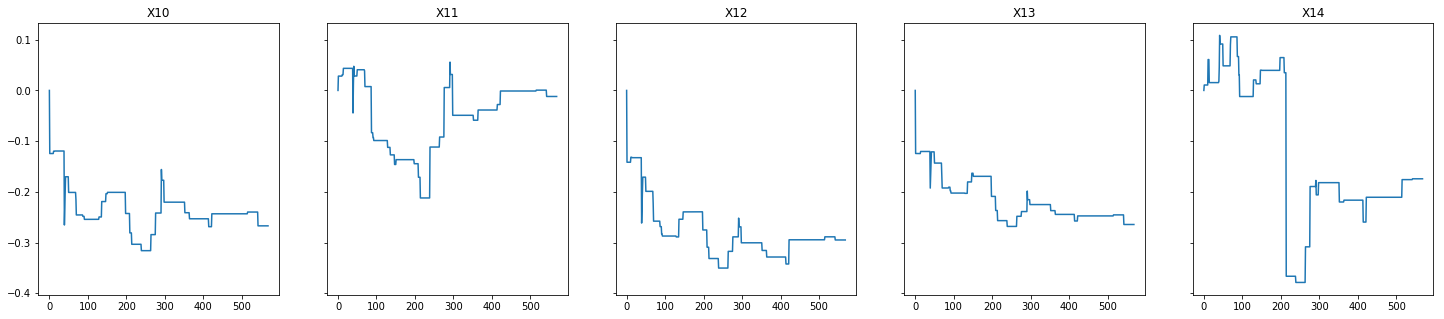

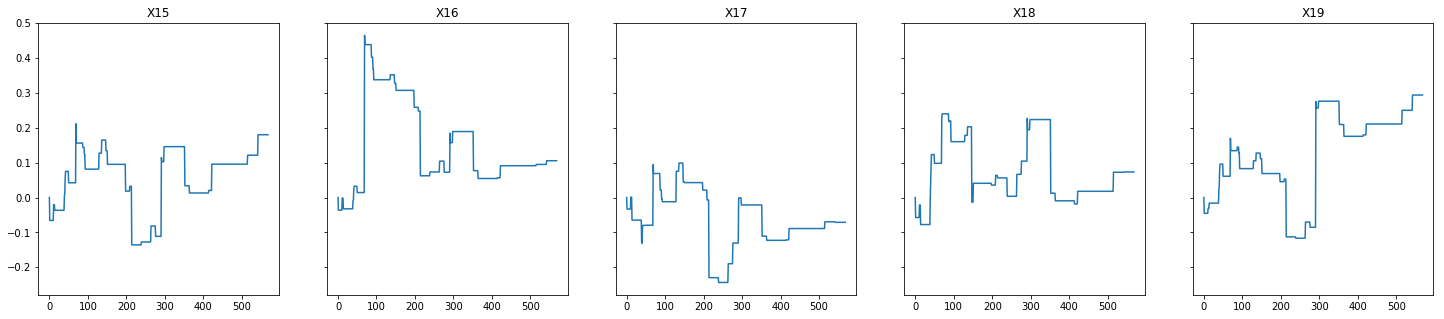

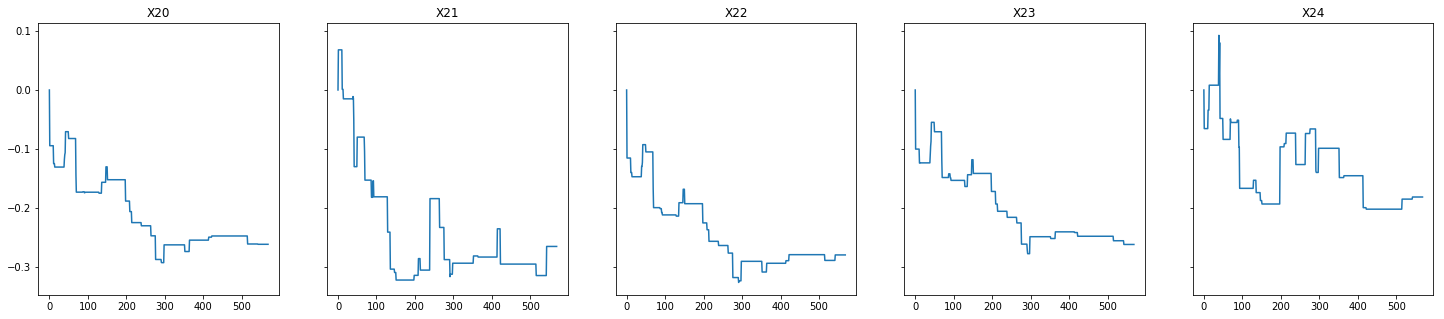

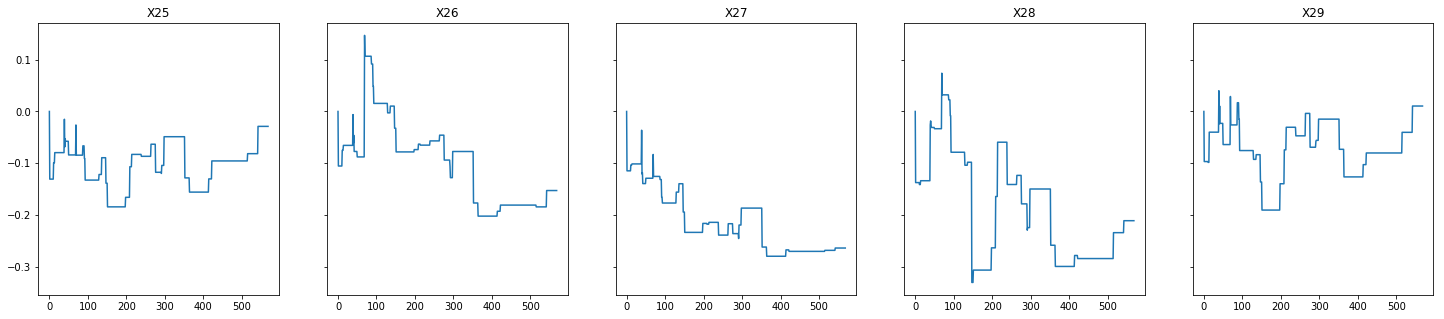

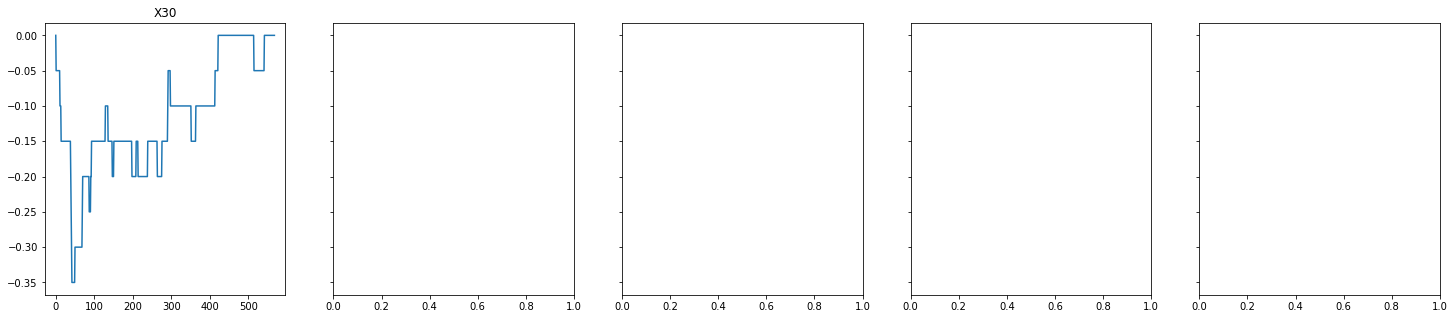

In [46]:
def plotear(datos,ind):
    fig, axs = plt.subplots(1, 5, sharey=True)
    fig.set_figheight(5)
    fig.set_figwidth(25)
    i = 0
    for dato in datos:
        axs[i].plot(dato)
        axs[i].title.set_text('X' + str(ind))
        i += 1
        ind += 1
    plt.show()

aux = 0
for dato in range(len(historic)-1)[::5]:
    plotear(historic[aux:dato+5],aux)
    aux = dato+5
fig, axs = plt.subplots(1, 5, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(25)
axs[0].plot(historic[-1])
axs[0].title.set_text('X30')
plt.show()

In [115]:
historical = [[0]]*len(X_train[0])
print(historical)

def forgetron(X_train,Y_train):
    k = 10
    memory = [[0]*31]*k
    
    importance = [0]*k
    for i in range(k):
        importance[k-i-1] = 0.5**(i+1)
    
    learning = 0.05
    start = time.time()
    
    for i in range(len(X_train)):
        
        weights = np.zeros(d)

        predict = prediction(X_train[i], weights)
        if predict != Y_train[i]:
            memory = memory[1:]
            memory.append(X_train[i])#Guardo en memoria el error
        
        for j in range(len(memory)):
            mem = memory[j]
            for k in range(len(mem)):
                weights[k] += mem[k] * importance[j]#weights = suma de X_errores * ponderacion
                
        for l in range(len(weights)):
            historical[l].append(weights[l])
                
    end = time.time()
    print(end - start , "segundos")
        
    return weights

print(forgetron(X_train,Y_train))

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
0.12425088882446289 segundos
[ 1.51879658  2.07724138  1.57761439  1.4519084   0.67640197  1.74914702
  2.00555928  1.77259002  0.8870407   0.14809742  1.0197981   0.56326119
  1.17306757  0.92705123 -0.19336996  1.22953079  0.92737662  0.8652843
 -0.15727691  0.45065668  1.49831467  1.79996946  1.67161032  1.30881727
  0.4669776   2.06319033  1.88715358  1.54916255  0.5633414   0.93560835
  0.99902344]


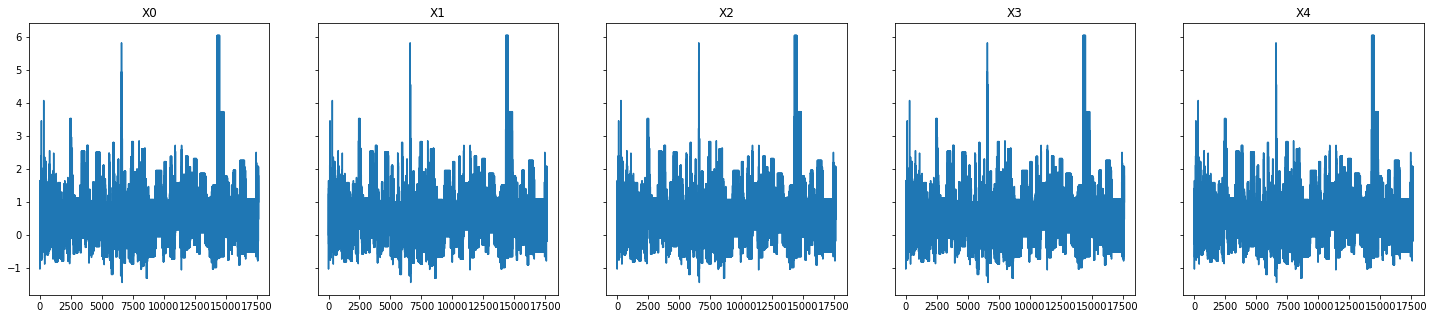

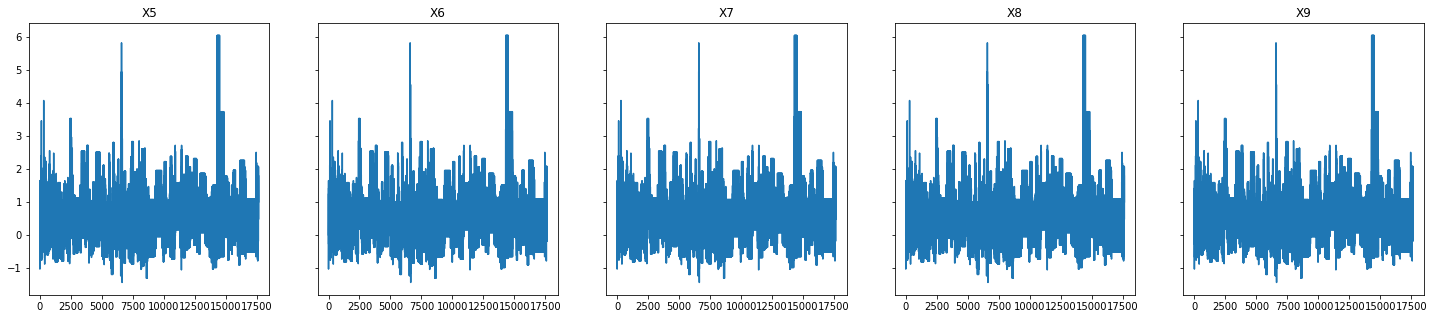

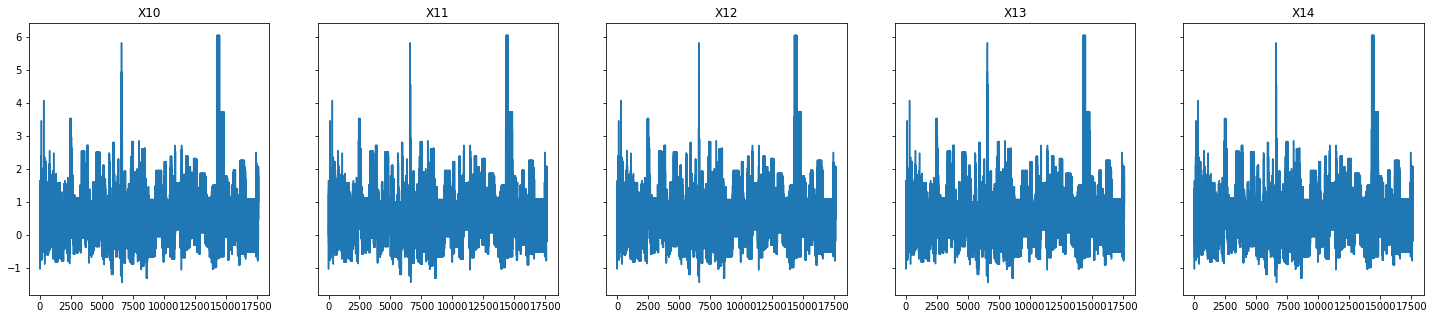

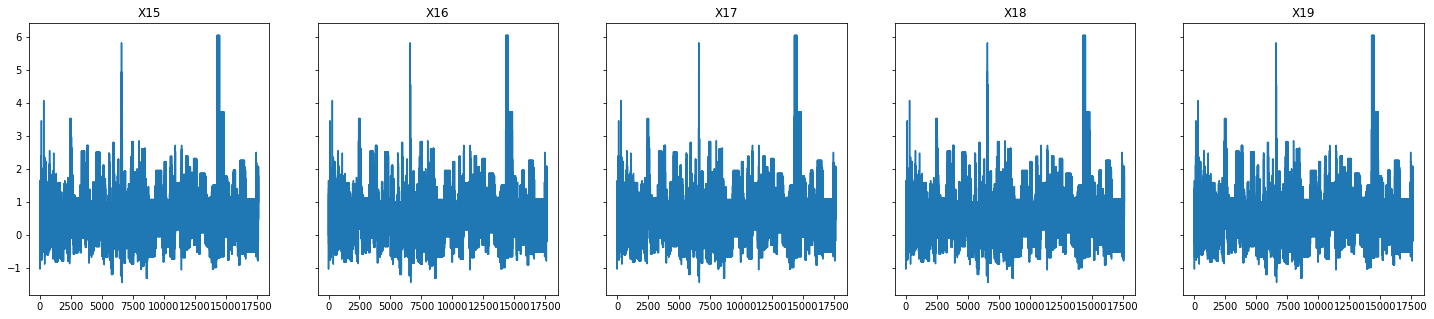

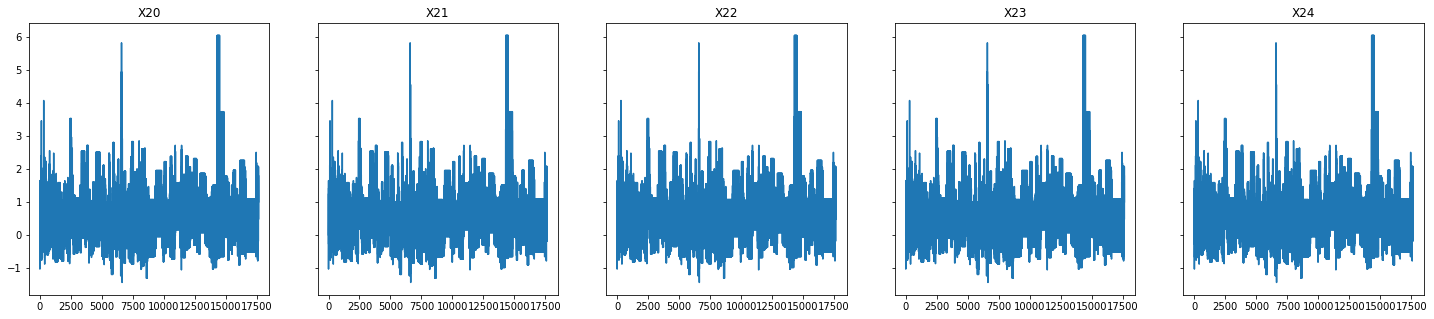

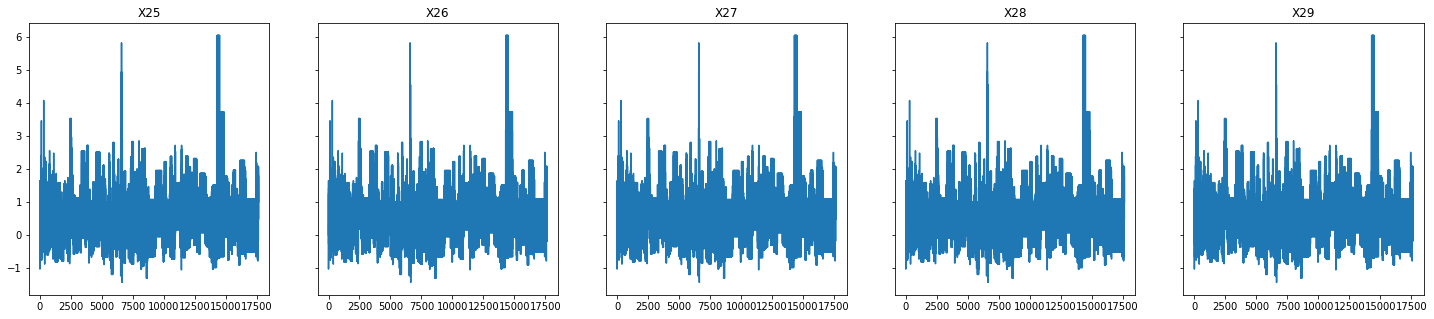

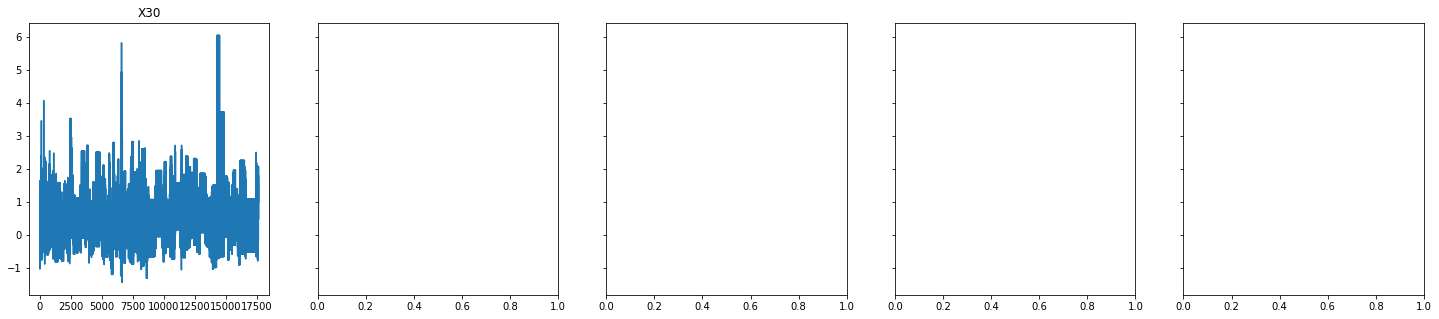

In [116]:
aux = 0
for dato in range(len(historical)-1)[::5]:
    plotear(historical[aux:dato+5],aux)
    aux = dato+5
fig, axs = plt.subplots(1, 5, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(25)
axs[0].plot(historical[-1])
axs[0].title.set_text('X30')
plt.show()

In [213]:
#PREGUNTA F) 
def sigmoidal(e):

    if e >= 710:                 #se verifica que el valor del exponenente no sobrepase límites
        e = 709
    elif e <= -746:           
        e = -745
    sigmoidal = (1/(1+math.e**-e))
    
    return round(sigmoidal,5)

def g(X_train,Y_train,i,weights):
    
    suma = np.zeros(len(X_train[0]))
    suma = np.dot(weights,X_train[i])
    
    
    return sigmoidal(suma)


#print(g(X_train,Y_train,20))

Se define la función sigmodail(e), como la función $\sigma(\xi)$, donde e = $\xi$ = $
( \sum_j w_j \cdot x^{(i)}_j +b )
$, que calcula:

$\sigma(\xi) = 1/(1+e^{-\xi}) $

Y se define la función g(X_train,Y_train,i), como la función que calcula $
\sigma( \sum_j w_j \cdot x^{(i)}_j +b )
$

El vector $w_j$, se calculó segun la función de SGD: 
$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

Los parámetros de la función g:

- X_train: data
- Y_train: vector resultado del problema
- i      : es utilizado para buscar el i-ésimo valor del vector Y_train y el i-ésimo vector de la data X_train

In [236]:
#PREGUNTA G

def lost_function(X_train, Y_train,i,funcion_g):


    if funcion_g == 1 or funcion_g == 0:
        lost = 0
    else:
        lost = (-(Y_train[i])*(math.log(funcion_g))) - ((1-(Y_train[i]))*(math.log(1-funcion_g)))
    return lost


#print(lost_function(X_train,Y_train))

lost_funcion es la función que representa *binary cross entropy*, es decir la función de pérdida, la cual es:
    
$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

Los parámetros de lost_function:

- X_train: data

- Y_train: vector resultado

- dato_i : es utilizado para buscar el i-ésimo valor del vector Y_train y el i-ésimo vector de la data X_train

In [229]:
#PREGUNTA H
def gradiente(X_train,Y_train,dato_i,funcion_g):

    gradiente = ((Y_train[dato_i])*(1-funcion_g))-((1-Y_train[dato_i])*(funcion_g))
    
        
    return gradiente*X_train[dato_i]


    

Una vez derivada la función *binary cross entropy*, se llegó a lo siguiente:

$$\nabla_{\vec{w}^{(t)}}\ell = (\cfrac{Y\cdot\sigma( \sum_j w_j \cdot x^{(i)}_j)\cdot(1-\sigma( \sum_j w_j \cdot x^{(i)}_j))}{\sigma( \sum_j w_j \cdot x^{(i)}_j)} +\cfrac{(1-Y)\cdot\sigma( \sum_j w_j \cdot x^{(i)}_j)\cdot(1-\sigma( \sum_j w_j \cdot x^{(i)}_j))}{(1-\sigma( \sum_j w_j \cdot x^{(i)}_j))})\cdot \vec{X}$$

Factorizando se llegó a la siguiente ecuación:

$$\nabla_{\vec{w}^{(t)}}\ell = -Y\cdot(1-\sigma( \sum_j w_j \cdot x^{(i)}_j)) - (1-Y)\cdot(\sigma( \sum_j w_j \cdot x^{(i)}_j))\cdot \vec{X}$$ 


donde $\vec{X} = [x_{1},x_{2},...,x_{j}]$ y


$\sigma( \sum_j w_j \cdot x^{(i)}_j) = g(x^{(i)},w)$





In [240]:
#PREGUNTA I
''' 
def SGD(X_train,Y_train):
    weights = np.zeros(len(X_train[0]))
    learning = 0.05
    y_gorro = np.zeros(len(Y_train))
    for i in range(len(X_train)):

        gradient = gradiente(X_train,Y_train,i)
        weights = weights - learning*gradient
        print(weights)
        y_gorro[i] = (np.dot(weights,X_train[i]))
        
        
    return y_gorro
print(SGD(X_train,Y_train))''' 


def perceptron_2(X_train,Y_train):
    weights = np.zeros(len(X_train[0]))
    learning = 0.001
    start = time.time()
    y_gorro = np.zeros(len(Y_train))
    for i in range(len(X_train)):
        if i == 0:
            funcion_g = 0
            gradient = gradiente(X_train,Y_train,i,funcion_g)
        else:
            funcion_g = g(X_train,Y_train,i,weights)
            gradient = gradiente(X_train,Y_train,i,funcion_g)
            weights = weights - lost_function(X_train,Y_train,i,funcion_g)*learning*gradient
        y_gorro[i] = np.dot(weights,X_train[i])
        
    end = time.time()
    
    print(end - start,"segundos")
    
    return y_gorro

#print(perceptron_2(X_train,Y_train))

SGD, función que representa el *Stochastic Gradient Descend*, de la siguiente forma:
    
$$\vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell$$

Los parámetros de SGD:

- X_train: data
- Y_train: vector resultado

0.031199932098388672 segundos


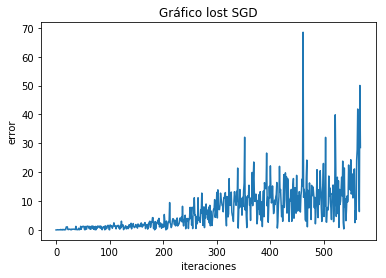

In [241]:
#PREGUNTA J

def grafico_y_gorro(X_train,Y_train):
    y_gorro = np.zeros(len(Y_train))
    diferencias = np.zeros(len(Y_train))
    y_gorro = perceptron_2(X_train,Y_train)
    lost = np.zeros(len(Y_train))
    #lost = lost_function(X_train,Y_train)
    
    diferencias = abs(y_gorro-Y_train)
    #plt.subplot(1,3,1)
    plt.plot(diferencias)
    plt.xlabel('iteraciones')
    plt.ylabel('error')
    plt.title('Gráfico lost SGD')
    '''plt.subplot(1,3,3)
    plt.plot(lost)
    plt.xlabel('iteraciones')
    plt.ylabel('error')
    plt.title('Gráfico binary cross entropy')
    ''' 
    plt.show()
    
    return 
    
(grafico_y_gorro(X_train,Y_train))




Con una tasa de aprendizaje baja, se observa que el error se incrementa, eso puede deberse a que el algoritmo sufre de la integración de muchos datos, pudiendo afectar el resultado.

In [70]:
lista = [[0]*31]*10
print(lista)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
